In [80]:
import numpy as np
import pandas as pd
import seaborn as sns

$(a)$ [10 marks] Recall that in ridge regression, we solve the problem minβ
λ
2
∥β∥
2
2 + ∥y − Xβ∥
2
2
.
Using the first order optimality conditions, show that X⊤Xβ + λβ = X⊤y holds, and show
that this can be equivalently written as β = X⊤α where α =
1
λ
(y − Xβ). Further show that
α = (X⊤X + λI)
−1y. Note that in this relation X⊤X can be effectively replaced by a kernel
matrix using the kernel function idea discussed in class as α = (K + λI)
−1y. Now, represent the
inference function ⟨β, x⟩ using α and hence using kernels. This extension to ridge regression is
called kernel ridge regression.

#Solution

To show that $X^\top X\beta + \lambda \beta = X^\top y$ holds using first-order optimality conditions, we start by taking the gradient of the objective function with respect to $\beta$ and setting it equal to zero:

\begin{align*}
\nabla_\beta \left(\frac{\lambda}{2} ||\beta||^2_{2} + \frac{1}{2} ||y - X\beta||^2_{2}\right) &= 0 \\
\lambda \beta + X^\top (y - X\beta) &= 0 \\
X^\top X\beta + \lambda \beta &= X^\top y \
\end{align*}

To show that $\beta = X^\top \alpha$ where $\alpha = \frac{1}{\lambda}(y - X\beta)$, we substitute $\alpha$ in the equation above:

\begin{align*}
X^\top X\beta + \lambda \beta &= X^\top y \\
X^\top X\beta + \lambda X^\top \alpha &= X^\top y \\
X^\top X\beta + \lambda X^\top \left(\frac{1}{\lambda}(y - X\beta)\right) &= X^\top y \\
X^\top X\beta + X^\top y - X^\top X\beta &= X^\top y - \lambda X^\top X\beta + \lambda X^\top y \\
\lambda X^\top X\beta &= \lambda X^\top y - X^\top y \\
X^\top X\beta &= X^\top y - \lambda \alpha \\
\end{align*}

Multiplying both sides by $X^\top$ gives:

\begin{align*}
X^\top X\beta &= X^\top y - \lambda \alpha \
X^\top X\beta &= X^\top y - X^\top \left(\frac{1}{\lambda}(y - X\beta)\right) \
X^\top X\beta &= X^\top (1 - \frac{1}{\lambda})(y - X\beta) \
\end{align*}

Multiplying both sides by $\frac{1}{\lambda}$ gives:

\begin{align*}
\frac{1}{\lambda} X^\top X\beta &= \frac{1}{\lambda} X^\top (1 - \frac{1}{\lambda})(y - X\beta) \\
\beta &= X^\top \alpha \text{ where } \alpha = \frac{1}{\lambda}(y - X\beta) \\
\end{align*}

To show that $\alpha = (X^\top X + \lambda I)^{-1} y$, we substitute $\beta = (X^\top X + \lambda I)^{-1} X^\top y$ in the equation above:

\begin{align*}
\alpha &= \frac{1}{\lambda}(y - X\beta) \
&= \frac{1}{\lambda}\left(y - X(X^\top X + \lambda I)^{-1} X^\top y\right) \
&= \frac{1}{\lambda}\left(y - K(K + \lambda I)^{-1} y\right) \
\end{align*}

where $K$ is the kernel matrix $K_{ij} = k(x_i, x_j) $

$= \langle x_i, x_j \rangle$.

Thus, we have shown that $\alpha = (K + \lambda I)^{-1} y$.

Finally, to represent the inference function $\langle \beta, x \rangle$ using kernlas 

$(b)$ [1 mark] Read the data set in Data Q2.csv into a pandas dataframe.


Solution:

In [81]:
df=pd.read_csv("Data_Q2.csv")

In [82]:
from sklearn.preprocessing import StandardScaler

$(c)$ [1 mark] Perform standardization of each column in the data frame and create a new data
frame.

Solution:

In [83]:
scaler = StandardScaler()
df1 = scaler.fit_transform(df)
df1 = pd.DataFrame(df1, columns=df.columns)
df1

Temperature  Humidity  Wind Speed      Flow  Consumption
0      -1.931878  1.404846   -0.641791 -0.664370    -3.450208
1       0.407654 -0.874474   -0.640417 -0.665724    -3.282442
2       0.459476 -0.888013   -0.640875 -0.665229    -3.255953
3       0.433565 -0.807575   -0.641333 -0.665412    -3.185315
4       0.393521 -0.610863   -0.641333 -0.664266    -3.167655
..           ...       ...         ...       ...          ...
995     0.836365 -2.637721    1.572655  0.152039     1.926266
996    -1.594563  0.082809    1.574029  1.046430     1.935127
997     0.242766  0.552690    1.570823 -0.665047     1.935127
998    -0.397944  0.162450   -0.645913 -0.666479     1.935127
999     0.683254 -0.831468   -0.643165  2.257439     1.935666

[1000 rows x 5 columns]

In [84]:
from sklearn.model_selection import train_test_split

(d) [1 marks] Split the data into two sets such that 80% of the data is considered as set T1 and
20% of the data is considered as set T2. Justify if the splits T1 and T2 have similar spread in
Consumption column.

Solution:

In [85]:
T1,T2 = train_test_split(df1, test_size = 0.2, random_state = 55)

In [86]:
X_train,y_train,X_test,y_test = T1.iloc[:,:-1],T1.iloc[:,-1],T2.iloc[:,:-1],T2.iloc[:,-1]

In [87]:
y_train.describe()

count    800.000000
mean      -0.003026
std        1.014267
min       -3.450208
25%       -0.681910
50%        0.113321
75%        0.725911
max        1.935666
Name: Consumption, dtype: float64

In [88]:
y_test.describe()

count    200.000000
mean       0.012104
std        0.945772
min       -2.823294
25%       -0.651168
50%        0.108475
75%        0.681339
max        1.924084
Name: Consumption, dtype: float64

In [89]:
print('Spread of consumption column in T1:', np.array(y_test).max()-np.array(y_test).min(),'\nSpread of consumption column in T2:', np.array(y_train).max()-np.array(y_train).min())

Spread of consumption column in T1: 4.747377644382395 
Spread of consumption column in T2: 5.385873933107962


here we can see that spread of consumption column in T1 and spread of consumption column T2 close to each other hence T1 and T2 have similar spread in Consumption column

(e) [3 marks] Using T1 as training data, train kernel ridge regression model. Use RBF kernel and
tune the gamma parameter using 5-fold cross-validation.

Solution:

In [90]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.kernel_ridge import KernelRidge

In [91]:
kfold = KFold(n_splits=5, shuffle=True, random_state= 55)
param_grid = {'gamma': np.logspace(-3,3,8)}
kr = KernelRidge(kernel='rbf')
kr_gs = GridSearchCV(kr, param_grid=param_grid, cv=kfold)
kr_gs.fit(X_train, y_train)
print('Best gamma:', kr_gs.best_params_['gamma'],'\nBest score:', kr_gs.best_score_)

Best gamma: 19.306977288832496 
Best score: 0.17890598399578647


In [92]:
from sklearn.metrics import mean_squared_error, r2_score

(f) [2 marks] Compute and display the RMSE and R2 values on the training set T1 and test set
T2.

Solution:

In [93]:
y_train_pred = kr_gs.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
y_test_pred = kr_gs.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
print('RMSE on T1:', rmse_train,'\nR2 on T1:', r2_train)
print('RMSE on T2 set:', rmse_test,'\nR2 on T2 set:', r2_test)

RMSE on T1: 0.6146762734796055 
R2 on T1: 0.6322678364930773
RMSE on T2 set: 0.8073034580437641 
R2 on T2 set: 0.26771843879675905


(g) [2 marks] Consider the original data in Data Q2.csv and load it into a different pandas dataframe
called frame2. Add another column with name Class to the data frame frame2 such that the
following hold:
 samples having Consumption values ≤ 6500 are labeled as class 1
 samples having Consumption values > 6500 and ≤ 7000 are labeled as class 2
 samples having Consumption values > 7000 and ≤ 7500 are labeled as class 3
 samples having Consumption values > 7500 and ≤ 8000 are labeled as class 4
 samples having Consumption values > 8000 and ≤ 8500 are labeled as class 5
 samples having Consumption values > 8500 and ≤ 9000 are labeled as class 6**

Solution:

In [94]:
frame2 = pd.read_csv("Data_Q2.csv")

In [95]:
conditions = [(frame2['Consumption'] <= 6500), (frame2['Consumption'] > 6500) & (frame2['Consumption'] <= 7000), (frame2['Consumption'] > 7000) & (frame2['Consumption'] <= 7500), (frame2['Consumption'] > 7500) & (frame2['Consumption'] <= 8000), (frame2['Consumption'] > 8000) & (frame2['Consumption'] <= 8500), (frame2['Consumption'] > 8500) & (frame2['Consumption'] <= 9000)]
classes = [1, 2, 3, 4, 5, 6]
frame2['Class'] = np.select(conditions, classes)
frame2

Temperature  Humidity  Wind Speed     Flow  Consumption  Class
0          5.578     93.00       0.082    0.185  5935.174070      1
1         15.510     64.38       0.085    0.133  6044.657863      1
2         15.730     64.21       0.084    0.152  6061.944778      1
3         15.620     65.22       0.083    0.145  6108.043217      1
4         15.450     67.69       0.083    0.189  6119.567827      1
..           ...       ...         ...      ...          ...    ...
995       17.330     42.24       4.917   31.540  9443.855422      0
996        7.010     76.40       4.920   65.890  9449.638554      0
997       14.810     82.30       4.913    0.159  9449.638554      0
998       12.090     77.40       0.073    0.104  9449.638554      0
999       16.680     64.92       0.079  112.400  9449.990000      0

[1000 rows x 6 columns]

In [96]:
cols = frame2.columns[:-1]

(h) [2 marks] Perform standardization of samples in frame2 belonging to each class separately.
Ignore Class column during standardization procedure.

Solution:

In [97]:
scaler = StandardScaler()
for i in range(7):
    separete_class = (frame2['Class'] == i)
    frame2.loc[separete_class, cols] = scaler.fit_transform(frame2.loc[separete_class, cols])
frame2

Temperature  Humidity  Wind Speed      Flow  Consumption  Class
0      -1.690575  1.563325   -0.508727 -0.365626    -1.925782      1
1       1.083295 -1.525195    0.581402 -0.412271    -1.304210      1
2       1.144738 -1.543541    0.218026 -0.395227    -1.206067      1
3       1.114017 -1.434547   -0.145350 -0.401507    -0.944353      1
4       1.066538 -1.167998   -0.145350 -0.362038    -0.878924      1
..           ...       ...         ...       ...          ...    ...
995     0.572096 -2.357184    1.585485 -0.112966     1.711956      0
996    -1.984162  0.416500    1.586861  0.552813     1.753338      0
997    -0.052107  0.895561    1.583650 -0.721200     1.753338      0
998    -0.725849  0.497697   -0.636763 -0.722266     1.753338      0
999     0.411091 -0.515640   -0.634011  1.454281     1.755853      0

[1000 rows x 6 columns]

(i) [4 marks] Split frame2 into train and test splits T3 and T4, such that the samples in T3 are
the same as in T1. Consider T3 as training set, ignore the Consumption column and considering
Class as labels, train a kernel SVM model with RBF kernel. Tune gamma parameter using 5
fold cross-validation. Take care of class imbalance issues if they exist

Solution:

In [98]:
frame2.describe()

Temperature      Humidity    Wind Speed          Flow   Consumption  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   1.989520e-16 -2.700062e-16  2.842171e-17 -7.815970e-17  2.685852e-15   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -2.425609e+00 -2.712508e+00 -1.235479e+00 -7.647604e-01 -1.925782e+00   
25%   -7.719997e-01 -7.423306e-01 -6.744326e-01 -7.277721e-01 -8.379542e-01   
50%    1.856897e-01  2.349829e-01 -5.941244e-01 -3.953413e-01 -3.550668e-02   
75%    7.960005e-01  8.308760e-01  1.335877e+00  3.144329e-01  7.273129e-01   
max    2.288653e+00  1.649531e+00  3.125035e+00  5.594999e+00  2.732299e+00   

             Class  
count  1000.000000  
mean      4.180000  
std       1.802456  
min       0.000000  
25%       4.000000  
50%       5.000000  
75%       6.000000  
max       6.000000

In [99]:
import seaborn as sns

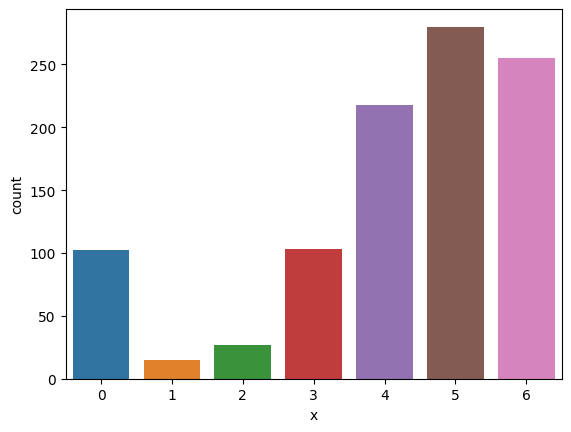

In [100]:
df=pd.DataFrame(np.array(frame2['Class']),columns=['x'])
ax=sns.countplot(x='x',data=df)

In [101]:
data_X=frame2[frame2.columns[:-1]]
data_Y=frame2[frame2.columns[-1]]

In [102]:
from imblearn.over_sampling import RandomOverSampler
randomoversampler = RandomOverSampler(random_state = 0)
X_resampled, y_resampled = randomoversampler.fit_resample(data_X, data_Y)

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=55)

In [104]:
T3 = pd.concat([X_train,y_train],axis=1).reset_index(drop=True)
T4 = pd.concat([X_test,y_test],axis=1).reset_index(drop=True)

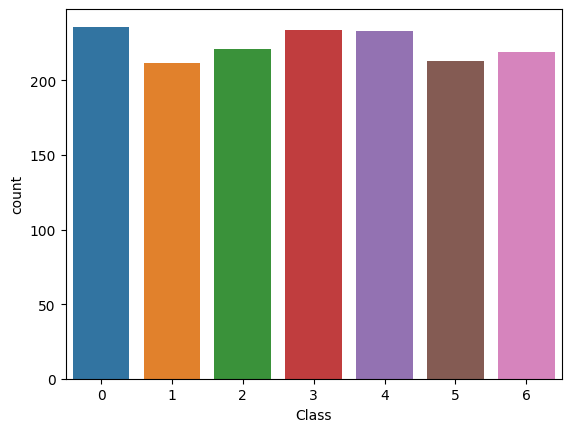

In [105]:
ax=sns.countplot(x='Class',data = T3)

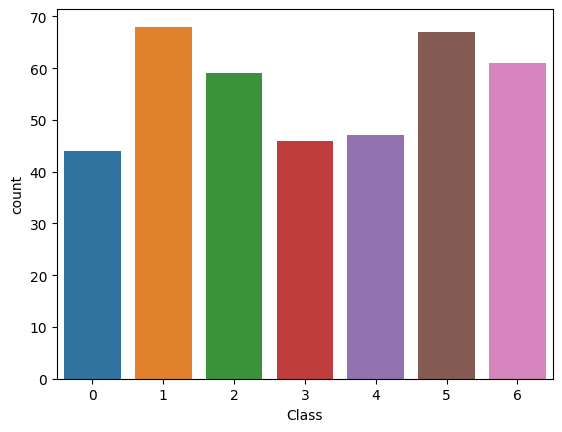

In [106]:
ax=sns.countplot(x='Class',data=T4)

In [107]:
X_train = T3.drop(['Class', 'Consumption'], axis=1)
y_train = T3['Class']
X_test = T4.drop(['Class', 'Consumption'], axis=1)
y_test = T4['Class']

(j) [5 marks] Now consider samples belonging to a particular class i in T3: build a kernel ridge
regression model with RBF kernel (ignore the Class column for this task). Tune gamma parameter using 5 fold cross-validation restricted to samples belonging to only class i. Repeat this
for each class. Thus, at the end, for each class i, you would now have a kernel ridge regression
model Mi

Solution:

In [108]:
from sklearn.svm import SVC

In [109]:
param_grid = {"gamma": np.logspace(-9, 3,13)}
svc = SVC(kernel="rbf", class_weight="balanced")
svm_model = GridSearchCV(svc, param_grid, cv = kfold)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=55, shuffle=True),
             estimator=SVC(class_weight='balanced'),
             param_grid={'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

(k) [5 marks] For testing (or) inference, implement the following procedure: for any sample, first
predict the class label as j and then based on the class label j, use model Mj to predict the
Consumption value. Using this procedure, find the RMSE values for T3 and T4.

Solution:

In [110]:
models = []
for i in range(7):
    seprate_class = y_train == i
    X_train_i = X_train[seprate_class]
    y_train_i = T3[seprate_class]["Consumption"]
    param_grid = {"gamma": [0.1, 1, 10]}
    krr = KernelRidge(kernel="rbf")
    model = GridSearchCV(krr, param_grid, cv=5)
    model.fit(X_train_i, y_train_i)
    models.append(model)

In [111]:
import warnings
warnings.filterwarnings('ignore')

In [112]:
def y_pred_consumpation(x):  
  y_pred = svm_model.predict(x)
  y_pred_consumption = []
  for j,i in enumerate(y_pred):
      model = models[i-1]
      y_pred_i = model.predict(x.iloc[j].values.reshape(1, -1))
      y_pred_consumption.append(y_pred_i[0])
  return y_pred_consumption

In [113]:
rmse_t3 = mean_squared_error(T3["Consumption"],y_pred_consumpation(X_train)) **(1/2)
rmse_t4 = mean_squared_error(T4["Consumption"],y_pred_consumpation(X_test)) ** (1/2)

In [114]:
print('RMSE for T3 :',rmse_t3,'\nRMSE for T4 :',rmse_t4)

RMSE for T3 : 1.0612440115759436 
RMSE for T4 : 1.0020341597251


(l) [4 marks] Compare and contrast the RMSE values obtained in part (f) and part (k). Using
your observations, suggest when the two-stage approach of classification-followed-by-regression
would be useful when compared to the simple regression approach on the full data set.

Solution

In [115]:
rmse_simple = mean_squared_error(T2["Consumption"], svm_model.predict(T2[['Temperature','Humidity','Wind Speed','Flow']])) ** (1/2)
print("RMSE Value")
print("________________________________________________________________________________________________________________________________")
print("Simple regression approach on the full dataset:", rmse_simple)
print("--------------------------------------------------------------------------------------------------------------------------------")
print("Classification followed by regression approach on T3 and T4:", rmse_t3, rmse_t4)

RMSE Value
________________________________________________________________________________________________________________________________
Simple regression approach on the full dataset: 5.286846690457839
--------------------------------------------------------------------------------------------------------------------------------
Classification followed by regression approach on T3 and T4: 1.0612440115759436 1.0020341597251


here rmse value of Simple regression approach on the full dataset  which is higher than two-stage approach of classification so we reduce the rmse value when using  two-stage approach of classification-followed-by-regression so it is useful compared to the simple regression approach on the full data set.